# 척추 데이터 분석

## 분석을 위해 도구들 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy as sp
import scipy.stats

## 파이썬 시각화 패키지 불러오기

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform

## 시각화에 들어갈 한글 폰트

In [3]:
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

## 데이터 불러오기

In [4]:
df1 = pd.read_csv('의료데이터/Patient_Diagnosis_Data.csv')
df = pd.read_csv('의료데이터/Patient_Surgery_Data.csv')
df2 = pd.read_csv('의료데이터/Medical_Image_Data_01.csv',encoding='CP949')

## 데이터 칼럼 확인

In [5]:
df.columns

Index(['환자ID', '수술기법', '수술시간', '수술실패여부', '수술일자', '신장', '연령', '입원일자', '재발여부',
       '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)', '혈액형'],
      dtype='object')

In [6]:
df1.columns

Index(['환자ID', 'Large Lymphocyte', 'Location of herniation', 'ODI', '가족력',
       '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별',
       '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)'],
      dtype='object')

In [7]:
df2.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

## 데이터 결합

In [8]:
df_md = df.merge(df1, on = ["환자ID","신장","연령","입원일자","체중","퇴원일자","헤모글로빈수치","환자통증정도","통증기간(월)"], how = 'left')
df_md = pd.merge(df_md, df2, on = "환자ID")
df_md.head()

,환자ID,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,1PT,TELD,68.0,0,20190715,163,66,20190713,0,60.3,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
1,2PT,TELD,31.0,0,20190716,171,47,20190715,0,71.7,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
2,3PT,TELD,78.0,0,20190731,178,39,20190729,0,77.1,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
3,4PT,TELD,73.0,0,20190802,174,40,20190731,0,74.2,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
4,5PT,TELD,29.0,0,20190906,183,42,20190903,0,80.7,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0


## 결합된 데이터 확인

In [9]:
df_md.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   수술기법                    1813 non-null   object 
 2   수술시간                    1840 non-null   float64
 3   수술실패여부                  1894 non-null   int64  
 4   수술일자                    1894 non-null   int64  
 5   신장                      1894 non-null   int64  
 6   연령                      1894 non-null   int64  
 7   입원일자                    1894 non-null   int64  
 8   재발여부                    1894 non-null   int64  
 9   체중                      1894 non-null   float64
 10  퇴원일자                    1894 non-null   int64  
 11  헤모글로빈수치                 1893 non-null   float64
 12  환자통증정도                  1894 non-null   int64  
 13  통증기간(월)                 1890 non-null   float64
 14  혈액형                     1894 non-null   

In [10]:
df_md.columns

Index(['환자ID', '수술기법', '수술시간', '수술실패여부', '수술일자', '신장', '연령', '입원일자', '재발여부',
       '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)', '혈액형', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '심혈관질환', '암발병여부',
       '우울증여부', '입원기간', '종양진행여부', '직업', '혈전합병증여부', '흡연여부', '전방디스크높이(mm)',
       '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI',
       'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치',
       '척추이동척도', '척추전방위증'],
      dtype='object')

## 결측치 확인

In [11]:
df_md.isnull().sum()

환자ID                         0
수술기법                        81
수술시간                        54
수술실패여부                       0
수술일자                         0
신장                           0
연령                           0
입원일자                         0
재발여부                         0
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
환자통증정도                       0
통증기간(월)                      4
혈액형                          0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
심혈관질환                        0
암발병여부                        0
우울증여부                        0
입원기간                         0
종양진행여부  

## 환자 ID 칼럼 삭제

In [12]:
# 환자 iD
df_md.drop(['환자ID'],axis = 1 , inplace = True)

## 오브젝트 값 변환

### 수술기법 숫자로 변경

In [13]:
# 수술기법 TELD는 0으로 IELD는 1로 변경
def WAYS(x):
    if x == 'TELD':
        return 0
    elif x == 'IELD':
        return 1

In [14]:
df_md['수술기법'] = df_md['수술기법'].apply(WAYS)

In [15]:
df_md['수술기법'].unique()

array([ 0.,  1., nan])

### 혈액형 숫자로 변경

In [16]:
# 혈액형 A형, B형, O형, AB형을 0 1 2 3 순으로 변경
def Blood(x):
    if x == 'RH+A':
        return 0
    elif x == 'RH+B':
        return 1
    elif x == 'RH+O':
        return 2
    else:
        return 3

In [17]:
df_md['혈액형'] = df_md['혈액형'].apply(Blood) 

In [18]:
df_md['혈액형'].unique()

array([0, 1, 2, 3], dtype=int64)

### 척추이동척도 숫자로 변경

In [19]:
# 혈액형 Down 0, Up 1 , Middle 2, Extremely down 3, Extremely up 4로 변경
def Bone(x):
    if x == 'Down':
        return 0
    elif x == 'Up':
        return 1
    elif x == 'Middle':
        return 2
    elif x == 'Extremely down':
        return 3
    else:
        return 4

In [20]:
df_md['척추이동척도'] = df_md['척추이동척도'].apply(Bone) 

In [21]:
df_md['척추이동척도'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

### 체중 범주형으로 추가

In [22]:
def 체중대(x):
    if x >= 100:
        return 100
    elif x>= 90:
        return 90
    elif x>= 80:
        return 80
    elif x>= 70:
        return 70
    elif x>= 60:
        return 60
    elif x>= 50:
        return 50
    elif x>= 40:
        return 40
    elif x>= 30:
        return 30
df_md['체중대'] = df_md['체중'].apply(체중대)

In [23]:
df_md['체중대'].unique()

array([ 60,  70,  80,  50,  90,  40, 100,  30], dtype=int64)

### 연령 범주형으로 추가

In [24]:
def 연령대(x):
    if x>= 80:
        return 80
    elif x>= 70:
        return 70
    elif x>= 60:
        return 60
    elif x>= 50:
        return 50
    elif x>= 40:
        return 40
    elif x>= 30:
        return 30
    elif x>= 20:
        return 20
    elif x>= 10:
        return 10
df_md['연령대'] = df_md['연령'].apply(연령대)

In [25]:
df_md['연령대'].unique()

array([60, 40, 30, 50, 70, 80, 20, 10], dtype=int64)

### 신장 범주형으로 추가

In [26]:
def 신장대(x):
    if x>= 200:
        return 200
    elif x>= 190:
        return 190
    elif x>= 180:
        return 180
    elif x>= 170:
        return 170
    elif x>= 160:
        return 160
    elif x>= 150:
        return 150
    else:
        return 140
df_md['신장대'] = df_md['신장'].apply(신장대)

In [27]:
df_md['신장대'].unique()

array([160, 170, 180, 150, 140, 190, 200], dtype=int64)

## 시각화 및 인사이트 도출

### 직업 그룹나누고 숫자로 변경

In [28]:
df_md.columns

Index(['수술기법', '수술시간', '수술실패여부', '수술일자', '신장', '연령', '입원일자', '재발여부', '체중',
       '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)', '혈액형', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '심혈관질환', '암발병여부',
       '우울증여부', '입원기간', '종양진행여부', '직업', '혈전합병증여부', '흡연여부', '전방디스크높이(mm)',
       '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES', 'Modic change', 'PI',
       'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도', '디스크단면적', '디스크위치',
       '척추이동척도', '척추전방위증', '체중대', '연령대', '신장대'],
      dtype='object')

In [29]:
df_md['직업'].unique()

array(['자영업', '운동선수', '특수전문직', '주부', '사업가', nan, '건설업', '운수업', '사무직',
       '공무원', '농업', '의료직', '학생', '군인', '노동직', '교사', '예술가', '무직'],
      dtype=object)

In [30]:
df_md.groupby('직업', as_index = False).agg(count = ('직업', 'count'))

,직업,count
0,건설업,17
1,공무원,51
2,교사,30
3,군인,90
4,노동직,42
5,농업,40
6,무직,164
7,사무직,449
8,사업가,39
9,예술가,10


<AxesSubplot:xlabel='직업', ylabel='count'>

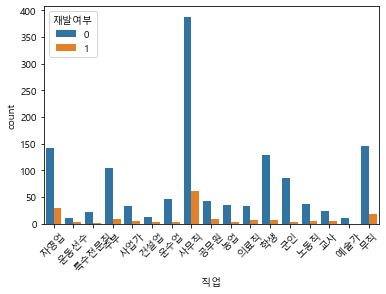

In [31]:
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '직업', hue='재발여부' )

<AxesSubplot:xlabel='직업', ylabel='count'>

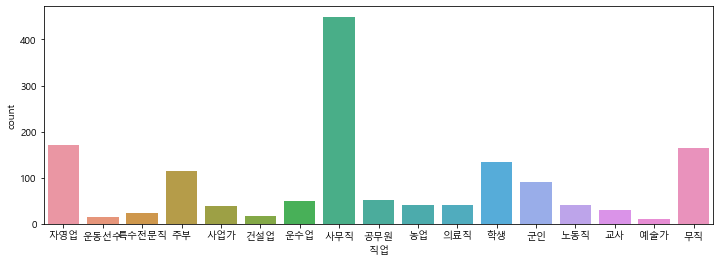

In [32]:
d1 = df_md[df_md['재발여부']==1]
plt.figure(figsize=(12, 4))
sns.countplot(data = df_md, x= '직업')

In [33]:
# 가장 많은 사무직과 아닌 사람들을 구분

def Job(x):
    if x == '사무직':
        return '사무직'
    else:
        return '기타'

df_md['사무직 여부'] = df_md['직업'].apply(Job)
df_md.head()

,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,...,Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증,체중대,연령대,신장대,사무직 여부
0,0.0,68.0,0,20190715,163,66,20190713,0,60.3,20190716,...,0,-1.01,2048.50,4,0,0,60,60,160,기타
1,0.0,31.0,0,20190716,171,47,20190715,0,71.7,20190716,...,0,-1.14,1753.10,4,1,0,70,40,170,기타
2,0.0,78.0,0,20190731,178,39,20190729,0,77.1,20190801,...,0,-1.77,1749.00,4,0,0,70,30,170,기타
3,0.0,73.0,0,20190802,174,40,20190731,0,74.2,20190803,...,0,-1.58,1796.20,4,0,0,70,40,170,기타
4,0.0,29.0,0,20190906,183,42,20190903,0,80.7,20190907,...,0,-0.79,2021.48,4,1,0,80,40,180,기타


In [34]:
df_md.groupby(['사무직 여부','수술실패여부']).agg(count = ('수술실패여부','count'))

count
사무직 여부 수술실패여부       
기타     0        1355
       1          90
사무직    0         424
       1          25

<AxesSubplot:xlabel='사무직 여부', ylabel='count'>

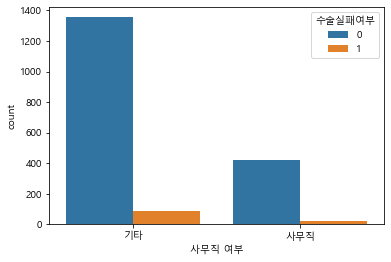

In [35]:
sns.countplot(data = df_md, x = '사무직 여부', hue='수술실패여부')

<AxesSubplot:xlabel='사무직 여부', ylabel='count'>

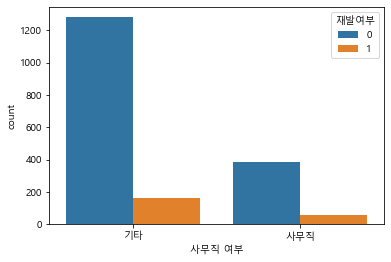

In [36]:
sns.countplot(data = df_md, x = '사무직 여부', hue='재발여부')

<AxesSubplot:xlabel='사무직 여부', ylabel='count'>

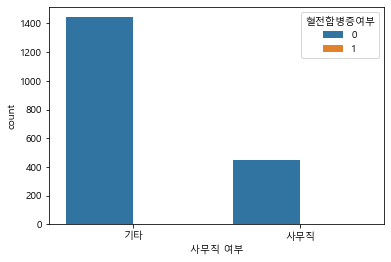

In [37]:
sns.countplot(data = df_md, x = '사무직 여부', hue='혈전합병증여부')

- 직업을 사무직이냐 아니냐로 분류를 하였을 때 특별히 도출되는 인사이트 없다.따라서 직업 칼럼은 삭제결정

In [38]:
df_md.drop(['직업', '사무직 여부'],axis = 1 , inplace = True)

### 혈전합병증 수 확인(추가 확인 필요)

In [39]:
df_md['혈전합병증여부'].unique()

array([0, 1], dtype=int64)

In [40]:
df_md.groupby(['혈전합병증여부','재발여부'], as_index = False).agg(count = ('혈전합병증여부', 'count'))

,혈전합병증여부,재발여부,count
0,0,0,1665
1,0,1,225
2,1,0,2
3,1,1,2


- 혈전합병증을 앓고있는 환자수가 1894명중 4명이며 그중 재발로 이어진 환자는 2명으로 전체의 0.1%로 유의미한 인사이트를 도출할 근거가 너무도 빈약하여 삭제결정

In [41]:
df_md.drop(['혈전합병증여부'],axis = 1 , inplace = True)

### 수술기법 인사이트 도출

<AxesSubplot:xlabel='수술기법', ylabel='count'>

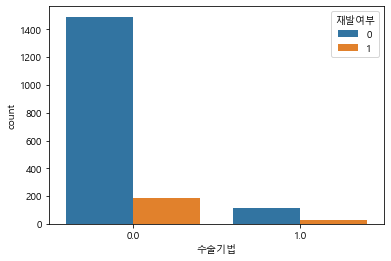

In [42]:
sns.countplot(data = df_md, x = '수술기법', hue='재발여부')

### 수술시간 인사이트 도출

In [43]:
#d2 = df_md[df_md['재발여부']==1]

([<matplotlib.axis.XTick at 0x216c21b0040>,
 [Text(0, 0, '5.0'),
  Text(1, 0, '6.0'),
  Text(2, 0, '7.0'),
  Text(3, 0, '10.0'),
  Text(4, 0, '12.0'),
  Text(5, 0, '13.0'),
  Text(6, 0, '14.0'),
  Text(7, 0, '15.0'),
  Text(8, 0, '16.0')])

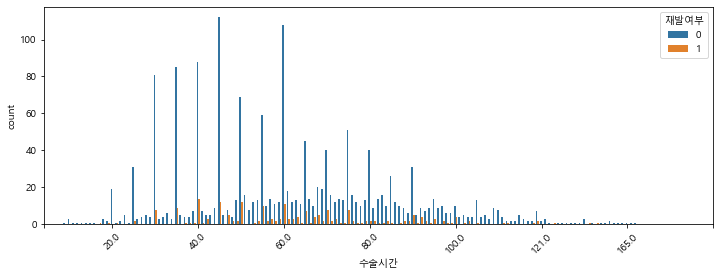

In [44]:
plt.figure(figsize=(12, 4))
sns.countplot(data = df_md, x = '수술시간', hue='재발여부')
plt.xticks([-5, 11,31,51,71,91,111,131,151],rotation=45)

### 신장 인사이트 도출

<AxesSubplot:xlabel='신장', ylabel='count'>

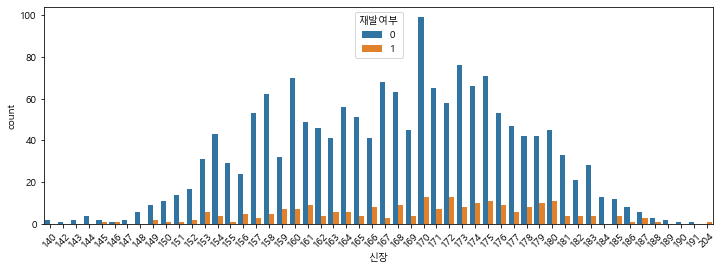

In [45]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '신장', hue='재발여부')

### 연령 인사이트 도출

<AxesSubplot:xlabel='연령', ylabel='count'>

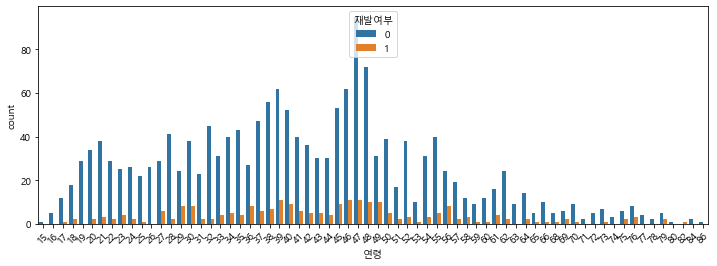

In [46]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '연령', hue='재발여부')

<AxesSubplot:xlabel='연령', ylabel='count'>

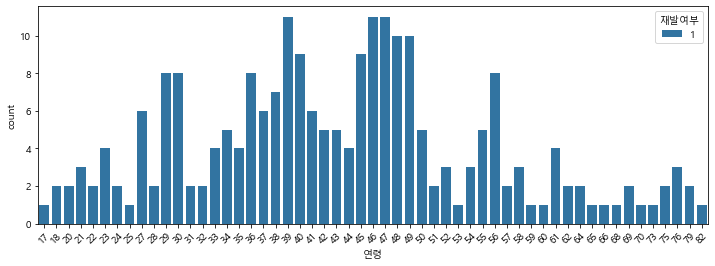

In [47]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=45)
sns.countplot(data = d1, x = '연령', hue='재발여부')

### 체중 인사이트 도출

<AxesSubplot:xlabel='체중대', ylabel='count'>

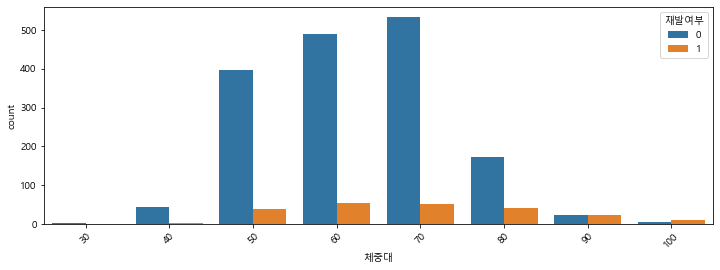

In [48]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '체중대', hue='재발여부')

### 헤모글로빈수치 인사이트 도출

<AxesSubplot:xlabel='헤모글로빈수치', ylabel='count'>

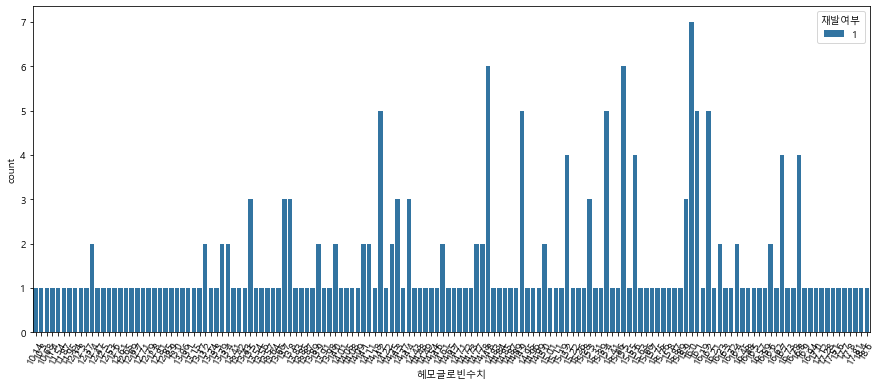

In [49]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=60)
sns.countplot(data = d1, x = '헤모글로빈수치', hue='재발여부')

### 환자통증정도 인사이트 도출

<AxesSubplot:xlabel='환자통증정도', ylabel='count'>

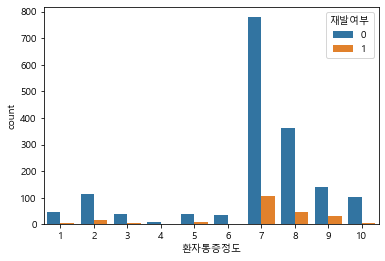

In [50]:
sns.countplot(data = df_md, x = '환자통증정도', hue='재발여부')

### 통증기간(월) 인사이트 도출

<AxesSubplot:xlabel='통증기간(월)', ylabel='count'>

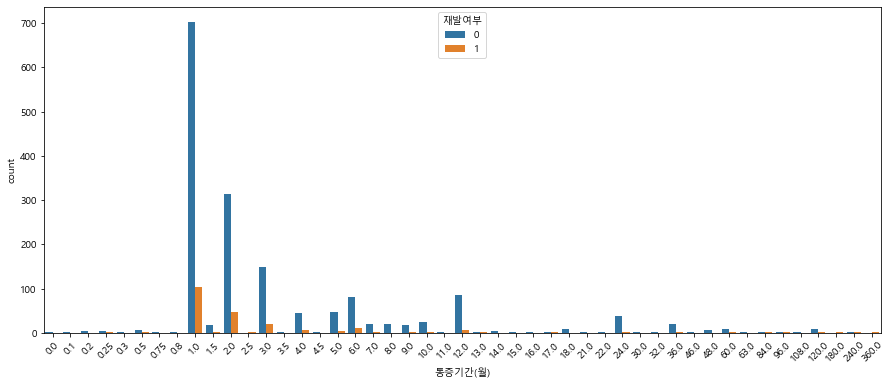

In [51]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '통증기간(월)', hue='재발여부')

<AxesSubplot:xlabel='통증기간(월)', ylabel='count'>

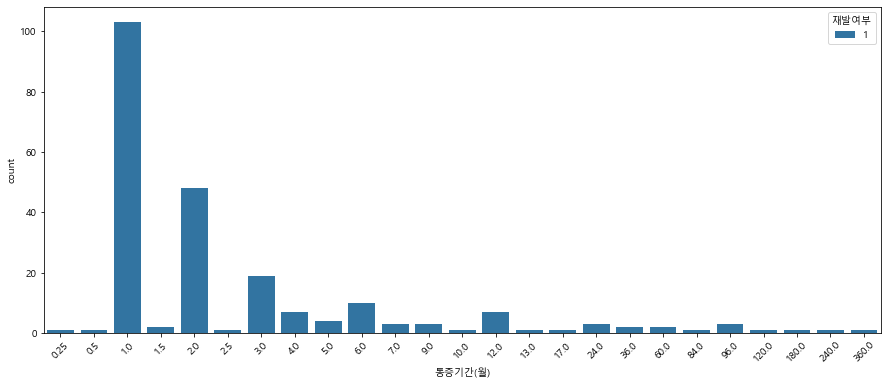

In [52]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.countplot(data = d1, x = '통증기간(월)', hue='재발여부')

### 혈액형 인사이트 도출

<AxesSubplot:xlabel='혈액형', ylabel='count'>

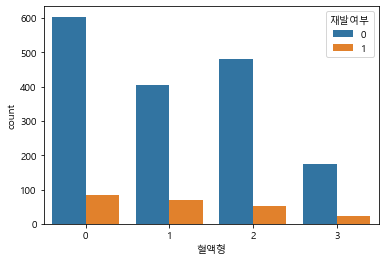

In [53]:
sns.countplot(data = df_md, x = '혈액형', hue='재발여부')

### Location of herniation 인사이트 도출

<AxesSubplot:xlabel='Location of herniation', ylabel='count'>

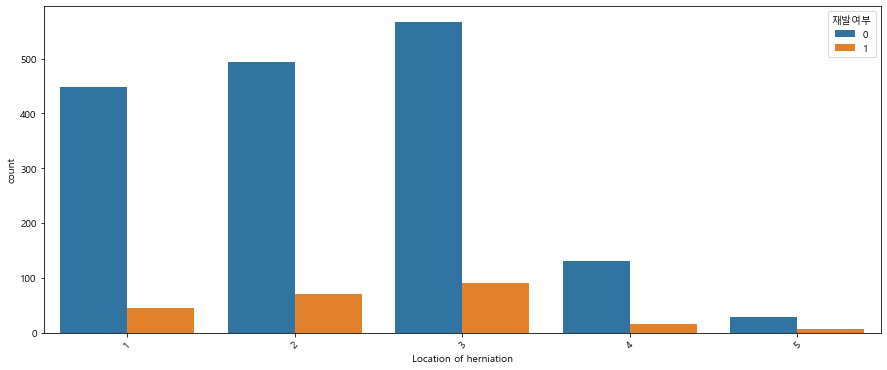

In [54]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = 'Location of herniation', hue='재발여부')

### 가족력 인사이트 도출

<AxesSubplot:xlabel='가족력', ylabel='count'>

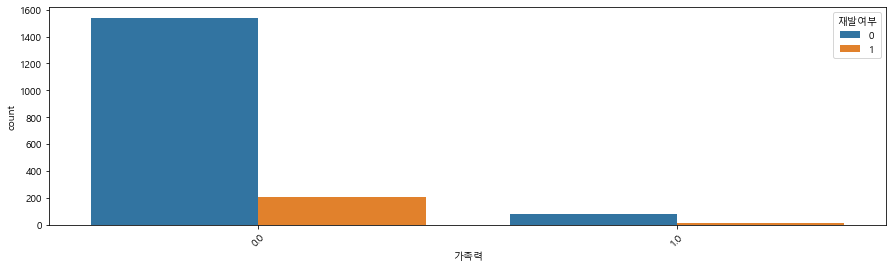

In [55]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '가족력', hue='재발여부')

### 간질성폐질환 인사이트 도출

<AxesSubplot:xlabel='간질성폐질환', ylabel='count'>

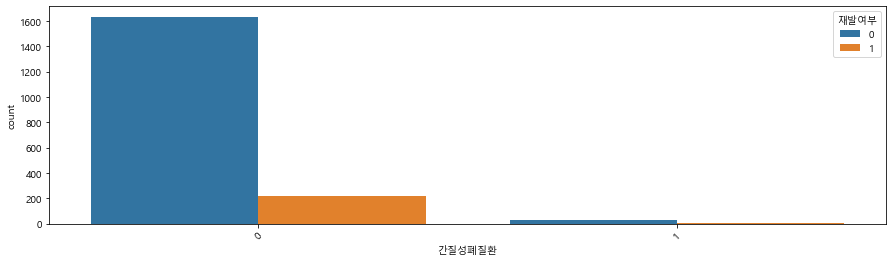

In [56]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '간질성폐질환', hue='재발여부')

### 고혈압여부 인사이트 도출

<AxesSubplot:xlabel='고혈압여부', ylabel='count'>

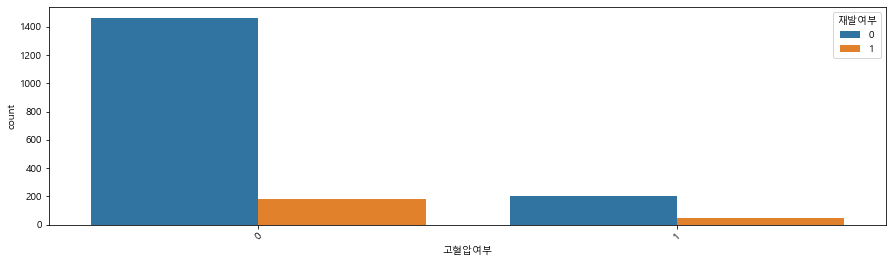

In [57]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '고혈압여부', hue='재발여부')

### 과거수술횟수 인사이트 도출

<AxesSubplot:xlabel='과거수술횟수', ylabel='count'>

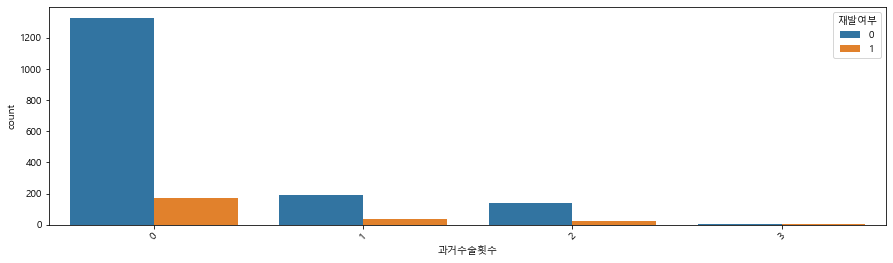

In [58]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '과거수술횟수', hue='재발여부')

### 당뇨여부 인사이트 도출

<AxesSubplot:xlabel='당뇨여부', ylabel='count'>

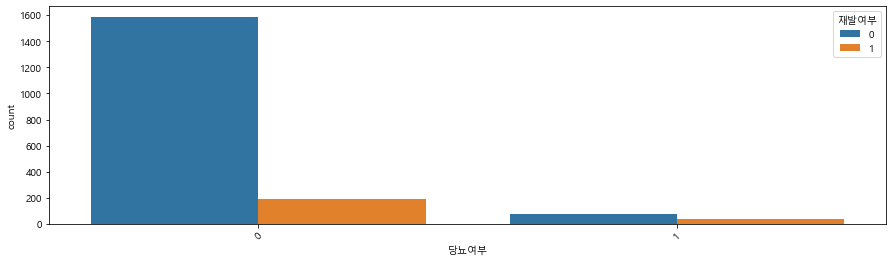

In [59]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '당뇨여부', hue='재발여부')

### 말초동맥질환여부 인사이트 도출

<AxesSubplot:xlabel='말초동맥질환여부', ylabel='count'>

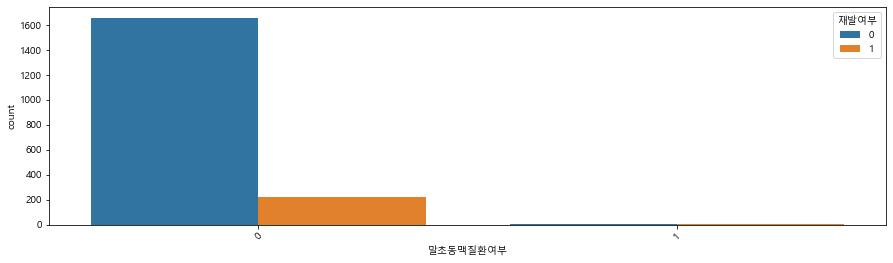

In [60]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '말초동맥질환여부', hue='재발여부')

### 빈혈여부 인사이트 도출

<AxesSubplot:xlabel='빈혈여부', ylabel='count'>

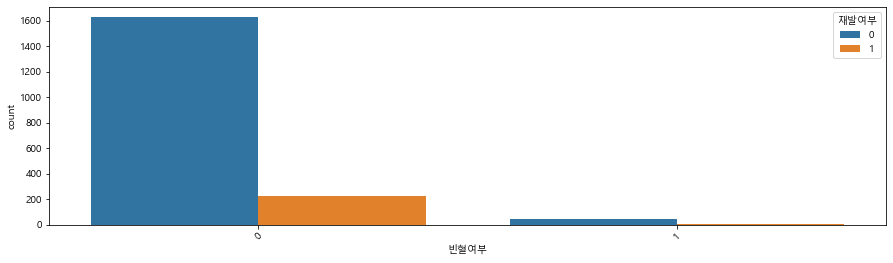

In [61]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '빈혈여부', hue='재발여부')

### 성별 인사이트 도출

<AxesSubplot:xlabel='성별', ylabel='count'>

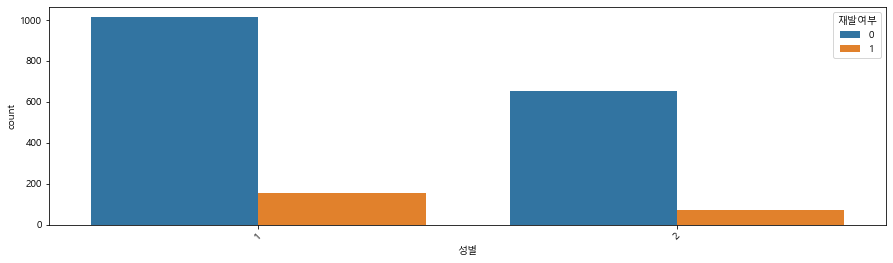

In [62]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '성별', hue='재발여부')

### 스테로이드치료 인사이트 도출

<AxesSubplot:xlabel='스테로이드치료', ylabel='count'>

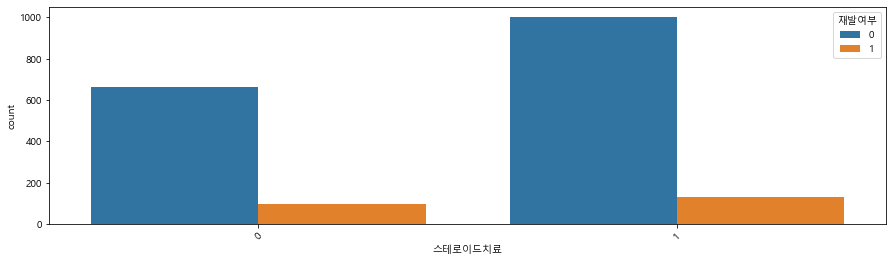

In [63]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '스테로이드치료', hue='재발여부')

### 신부전여부 인사이트 도출

<AxesSubplot:xlabel='신부전여부', ylabel='count'>

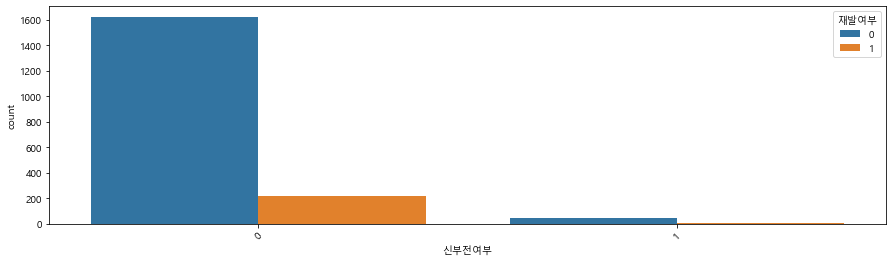

In [64]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '신부전여부', hue='재발여부')

### 심혈관질환 인사이트 도출

<AxesSubplot:xlabel='심혈관질환', ylabel='count'>

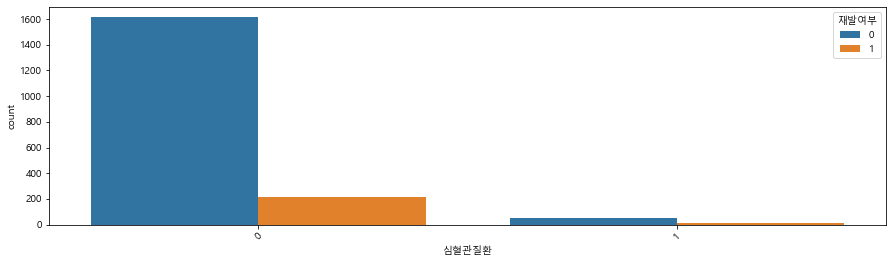

In [65]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '심혈관질환', hue='재발여부')

### 암발병여부 인사이트 도출

<AxesSubplot:xlabel='암발병여부', ylabel='count'>

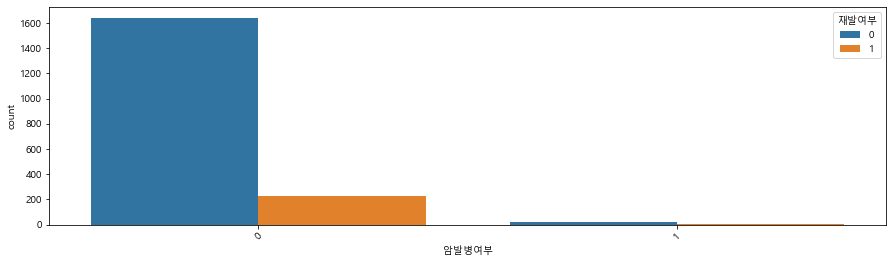

In [66]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=45)
sns.countplot(data = df_md, x = '암발병여부', hue='재발여부')

### 후방디스크높이(mm) 인사이트 도출

<Figure size 1152x504 with 0 Axes>

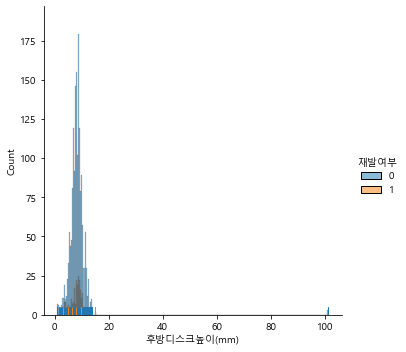

In [67]:
plt.figure(figsize=(16, 7))
sns.displot(data = df_md, x = '후방디스크높이(mm)', hue='재발여부', rug = True)

### 지방축적도 인사이트 도출

<Figure size 1152x288 with 0 Axes>

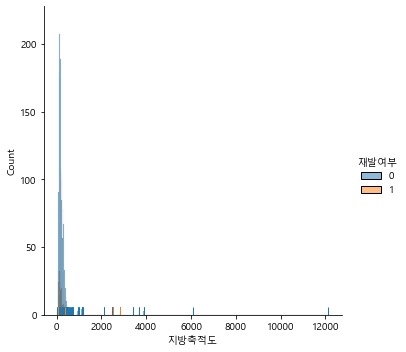

In [68]:
plt.figure(figsize=(16, 4))
sns.displot(data = df_md, x = '지방축적도', hue='재발여부', rug = True)

### Instability 인사이트 도출

<AxesSubplot:xlabel='Instability', ylabel='count'>

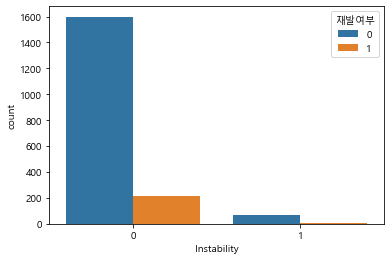

In [69]:
sns.countplot(data = df_md, x = 'Instability', hue='재발여부')

### MF + ES 인사이트 도출

<Figure size 1152x288 with 0 Axes>

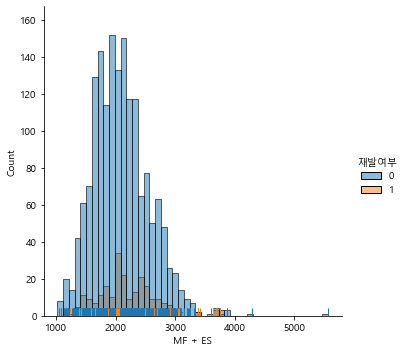

In [70]:
plt.figure(figsize=(16, 4))
sns.displot(data = df_md, x = 'MF + ES', hue='재발여부', rug = True)

### Modic change 인사이트 도출

<AxesSubplot:xlabel='Modic change', ylabel='count'>

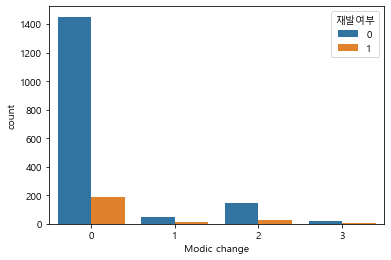

In [71]:
sns.countplot(data = df_md, x = 'Modic change', hue='재발여부')

### PI 인사이트 도출

<Figure size 1152x288 with 0 Axes>

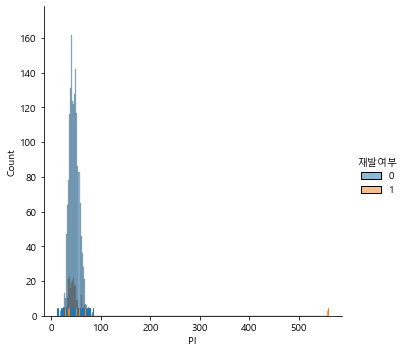

In [72]:
plt.figure(figsize=(16, 4))
sns.displot(data = df_md, x = 'PI', hue='재발여부', rug = True)

### PT 인사이트 도출

<Figure size 1152x288 with 0 Axes>

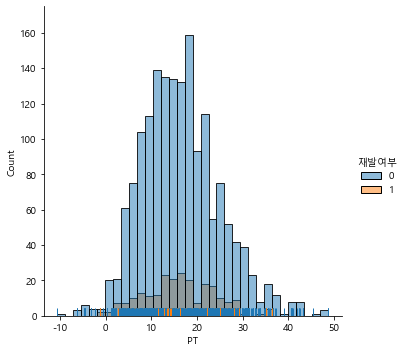

In [73]:
plt.figure(figsize=(16, 4))
sns.displot(data = df_md, x = 'PT', hue='재발여부', rug = True)

### Seg Angle(raw) 인사이트 도출

<Figure size 1152x288 with 0 Axes>

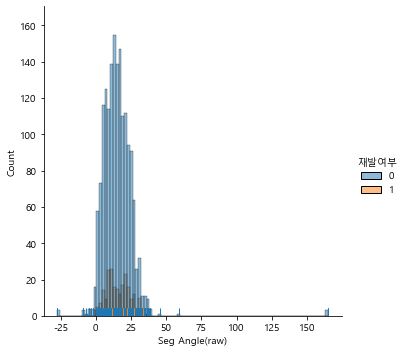

In [74]:
plt.figure(figsize=(16, 4))
sns.displot(data = df_md, x = 'Seg Angle(raw)', hue='재발여부', rug = True)

### Vaccum disc 인사이트 도출

<AxesSubplot:xlabel='Vaccum disc', ylabel='count'>

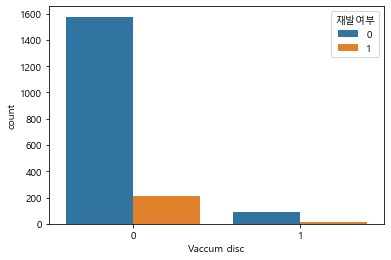

In [75]:
sns.countplot(data = df_md, x = 'Vaccum disc', hue='재발여부')

### 디스크단면적 인사이트 도출

<Figure size 1152x288 with 0 Axes>

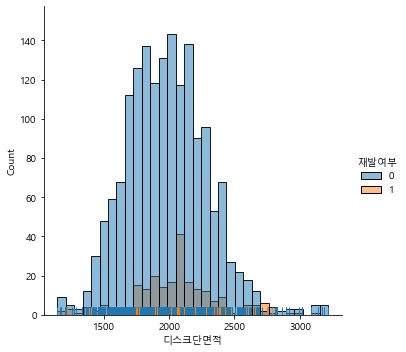

In [76]:
plt.figure(figsize=(16, 4))
sns.displot(data = df_md, x = '디스크단면적', hue='재발여부', rug = True)

### 디스크위치 인사이트 도출

<AxesSubplot:xlabel='디스크위치', ylabel='count'>

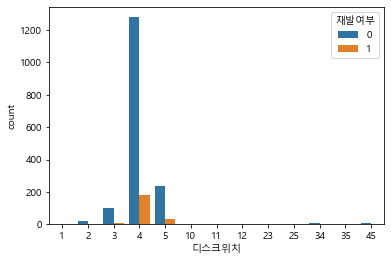

In [77]:
sns.countplot(data = df_md, x = '디스크위치', hue='재발여부')

### 척추이동척도 인사이트 도출

<AxesSubplot:xlabel='척추이동척도', ylabel='count'>

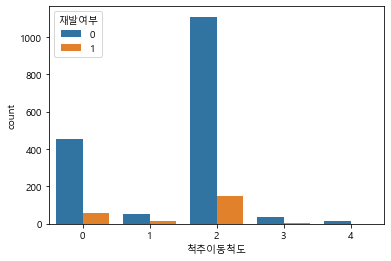

In [78]:
sns.countplot(data = df_md, x = '척추이동척도', hue='재발여부')

### 척추전방위증 인사이트 도출

<AxesSubplot:xlabel='척추전방위증', ylabel='count'>

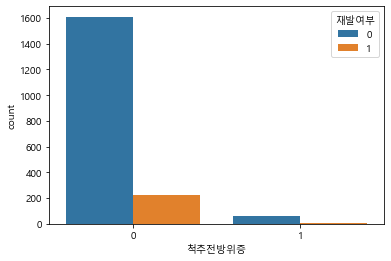

In [79]:
sns.countplot(data = df_md, x = '척추전방위증', hue='재발여부')

## 결측치 채우고 형 변환

In [80]:
# 데이터프레임 결측치 개수 확인
df_md.isnull().sum()

수술기법                        81
수술시간                        54
수술실패여부                       0
수술일자                         0
신장                           0
연령                           0
입원일자                         0
재발여부                         0
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
환자통증정도                       0
통증기간(월)                      4
혈액형                          0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
심혈관질환                        0
암발병여부                        0
우울증여부                        0
입원기간                         0
종양진행여부                       0
흡연여부    

In [81]:
# 데이터프레임 feature별 결측치 비율
df_md.isnull().sum() / len(df_md)*100

수술기법                       4.276663
수술시간                       2.851109
수술실패여부                     0.000000
수술일자                       0.000000
신장                         0.000000
연령                         0.000000
입원일자                       0.000000
재발여부                       0.000000
체중                         0.000000
퇴원일자                       0.000000
헤모글로빈수치                    0.052798
환자통증정도                     0.000000
통증기간(월)                    0.211193
혈액형                        0.000000
Large Lymphocyte           0.000000
Location of herniation     0.000000
ODI                       75.607181
가족력                        2.692714
간질성폐질환                     0.000000
고혈압여부                      0.000000
과거수술횟수                     0.000000
당뇨여부                       0.000000
말초동맥질환여부                   0.000000
빈혈여부                       0.000000
성별                         0.000000
스테로이드치료                    0.000000
신부전여부                      0.000000
심혈관질환                      0

- 특정 변수의 결측값 비율이 매우 높고, 결측값을 채워넣을 만한 마땅한 방법이 없는 경우에는 분석의 신뢰성 확보를 위해서 그 변수(행, 칼럼)을 삭제하고 분석을 진행할 필요가 있다.
  따라서 결측치 비율이 75.6%인 ODI와 47.3%인 골밀도는 삭제한다. 

In [82]:
df_md = df_md.drop(['ODI','골밀도'], axis = 1)

In [83]:
(df_md['수술기법'] == 0).sum() / len(df_md['수술기법'].notnull())*100

88.33157338965152

In [84]:
(df_md['수술기법'] == 1).sum() / len(df_md['수술기법'].notnull())*100

7.391763463569166

In [85]:
df_md['수술기법'].notnull().sum() / len(df_md['수술기법'].notnull())*100

95.7233368532207

In [86]:
def cal_per(x):
    if (df_md['수술기법'].notnull().sum() / len(df_md['수술기법'].notnull())*100) >= (df_md['수술기법'] == 0).sum() / len(df_md['수술기법'].notnull())*100 :
        return 0
    else:
        return 1

In [87]:
df_md['수술기법']= df_md['수술기법'].fillna(cal_per(df_md['수술기법']))

In [88]:
df_md['수술기법'].unique()

array([0., 1.])

In [89]:
len(df_md['수술기법'])

1894

In [90]:
(df_md['가족력'] == 0).sum() / len(df_md['가족력'].notnull())*100

92.44984160506864

In [91]:
df_md['가족력'].notnull().sum() / len(df_md.notnull())*100

97.30728616684267

In [92]:
def cal_per(x):
    if (df_md['가족력'].notnull().sum() / len(df_md['가족력'].notnull())*100) >= (df_md['가족력'] == 0.).sum() / len(df_md['가족력'].notnull())*100 :
        return 0.
    else:
        return 1.

In [93]:
df_md['가족력']= df_md['가족력'].fillna(cal_per(df_md['가족력']))

In [94]:
df_md['가족력'].unique()

array([0., 1.])

In [95]:
len(df_md['가족력'])

1894

In [96]:
#결측치가 1~4개인 feature는 중간값 or 평균값으로 채운다.
df_md['통증기간(월)'] = df_md['통증기간(월)'].fillna(1)
df_md['수술시간'] = df_md['수술시간'].fillna(df_md['수술시간'].mean())
df_md['PI'] = df_md['PI'].fillna(df_md['PI'].median())
df_md['PT'] = df_md['PT'].fillna(df_md['PT'].median())
df_md['Seg Angle(raw)'] = df_md['Seg Angle(raw)'].fillna(df_md['Seg Angle(raw)'].median())
df_md['지방축적도'] = df_md['지방축적도'].fillna(df_md['지방축적도'].median())
df_md['헤모글로빈수치'] = df_md['헤모글로빈수치'].fillna(df_md['헤모글로빈수치'].median())

In [97]:
# EDA 후 머신러닝 적용전에 중복되는 feature 미리 제거해준다.
df_m = df_md.drop(['체중대','연령대','신장대'], axis = 1)

In [98]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   수술기법                    1894 non-null   float64
 1   수술시간                    1894 non-null   float64
 2   수술실패여부                  1894 non-null   int64  
 3   수술일자                    1894 non-null   int64  
 4   신장                      1894 non-null   int64  
 5   연령                      1894 non-null   int64  
 6   입원일자                    1894 non-null   int64  
 7   재발여부                    1894 non-null   int64  
 8   체중                      1894 non-null   float64
 9   퇴원일자                    1894 non-null   int64  
 10  헤모글로빈수치                 1894 non-null   float64
 11  환자통증정도                  1894 non-null   int64  
 12  통증기간(월)                 1894 non-null   float64
 13  혈액형                     1894 non-null   int64  
 14  Large Lymphocyte        1894 non-null   

In [99]:
df_m.describe()

,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증
count,1894.000000,1894.000000,1894.000000,1.894000e+03,1894.000000,1894.000000,1.894000e+03,1894.000000,1894.000000,1.894000e+03,...,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1893.000000,1894.000000,1894.000000,1894.000000
mean,0.073918,62.066304,0.060718,2.016023e+07,168.027983,41.463569,2.016015e+07,0.119852,68.111140,2.016000e+07,...,2096.421600,0.247096,46.590496,16.328511,15.287518,0.056494,1989.788774,4.430834,1.461985,0.032207
std,0.261706,24.635536,0.238875,3.682868e+04,9.211419,13.444629,3.677496e+04,0.324874,11.234318,3.689652e+04,...,472.834488,0.661506,22.712281,8.412470,10.423658,0.230935,314.478436,3.595680,0.940030,0.176596
min,0.000000,5.000000,0.000000,2.009012e+07,140.000000,15.000000,2.009012e+07,0.000000,35.000000,2.009012e+07,...,1016.800000,0.000000,11.900000,-10.600000,-27.400000,0.000000,1145.800000,1.000000,0.000000,0.000000
25%,0.000000,45.000000,0.000000,2.012111e+07,161.000000,32.000000,2.012111e+07,0.000000,59.700000,2.012101e+07,...,1765.285000,0.000000,38.700000,10.500000,8.825000,0.000000,1777.000000,4.000000,0.000000,0.000000
50%,0.000000,60.000000,0.000000,2.019010e+07,169.000000,41.000000,2.018123e+07,0.000000,68.000000,2.019010e+07,...,2056.500000,0.000000,45.100000,15.700000,14.500000,0.000000,1985.500000,4.000000,2.000000,0.000000
75%,0.000000,76.000000,0.000000,2.019062e+07,175.000000,49.000000,2.019062e+07,0.000000,75.000000,2.019062e+07,...,2374.350000,0.000000,52.000000,21.400000,21.100000,0.000000,2178.500000,4.000000,2.000000,0.000000
max,1.000000,220.000000,1.000000,2.020081e+07,204.000000,86.000000,2.020080e+07,1.000000,136.100000,2.020081e+07,...,5569.000000,3.000000,559.000000,48.700000,165.000000,1.000000,3214.200000,45.000000,4.000000,1.000000


## 이상치 확인
 ### 이상치 발견 및 제거 (z-score 활용)
- 개별 Z-score 는 해당 데이터가 평균으로 부터 얼마나 멀리 떨어져 있는지,

  그 떨어진 정도가 표준편차의 몇배인지를 나타낸다

  Z-score의 값이 아주 클수록 평균에서는 아주먼 값이며, 표준편차보다는 큰 값을 의미한다.

  즉, 이상치이다.


In [100]:
#우리는 표준화된 Z-score를 통해 잘못된 이상치를 파악할 수 있다.

#통상적으로 Z-score의 절대값이 3가 넘는 경우 이를 이상치라 정의한다.

# check Z score 
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in df_m:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(df_m[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>3)|(df_Zscore[f'{one_col}_Zscore']<-3)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", df_m.shape)
all_outlier_idx = sum(outlier_idx_list,[])
df_m = df_m.drop(all_outlier_idx)
print("After (drop outlier)", df_m.shape)

#Z score가 -3 미만이거나 3 이상인 값을 추려내는 과정을 거쳤다. 
#이후 해당 값들의 인덱스를 outlier list에 담았고, 표준화를 거친 데이터에서 해당 인덱스 만 삭제했다. 

Check 수술기법
수술기법 Has outliers
 19      3.539572
30      3.539572
36      3.539572
43      3.539572
84      3.539572
          ...   
1818    3.539572
1849    3.539572
1865    3.539572
1866    3.539572
1891    3.539572
Name: 수술기법_Zscore, Length: 140, dtype: float64

Check 수술시간
수술시간 Has outliers
 250     3.448520
347     3.651532
597     3.529725
788     3.610930
805     3.570327
862     3.204905
873     3.326712
992     3.164302
1086    4.179364
1128    5.194427
1312    3.164302
1331    3.570327
1428    3.773339
1744    3.164302
1785    6.412501
1866    3.367315
Name: 수술시간_Zscore, dtype: float64

Check 수술실패여부
수술실패여부 Has outliers
 9       3.933137
20      3.933137
62      3.933137
67      3.933137
79      3.933137
          ...   
1757    3.933137
1765    3.933137
1791    3.933137
1818    3.933137
1853    3.933137
Name: 수술실패여부_Zscore, Length: 115, dtype: float64

Check 수술일자
수술일자 Has Not outlier

Check 신장
신장 Has outliers
 896    -3.043547
1579    3.906186
1763   -3.043547
Name: 신장_Zscore, 

Check Vaccum disc
Vaccum disc Has outliers
 6       4.086678
8       4.086678
11      4.086678
23      4.086678
41      4.086678
          ...   
1862    4.086678
1876    4.086678
1884    4.086678
1888    4.086678
1891    4.086678
Name: Vaccum disc_Zscore, Length: 107, dtype: float64

Check 디스크단면적
디스크단면적 Has Not outlier

Check 디스크위치
디스크위치 Has outliers
 957     11.285731
1024     5.722032
1086    11.285731
1095    11.285731
1139    11.285731
1164    11.285731
1308     8.225697
1314     5.165662
1319     8.225697
1342     8.225697
1345    11.285731
1410     8.503881
1415    11.285731
1556     8.225697
1587    11.285731
1606     8.225697
1658    11.285731
1719     8.225697
1769     8.225697
1803     8.225697
Name: 디스크위치_Zscore, dtype: float64

Check 척추이동척도
척추이동척도 Has Not outlier

Check 척추전방위증
척추전방위증 Has outliers
 14      5.481713
111     5.481713
202     5.481713
204     5.481713
251     5.481713
          ...   
1783    5.481713
1784    5.481713
1848    5.481713
1873    5.481713
1878    

In [101]:
df_m.shape

(1067, 46)

In [102]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 1 to 1893
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   수술기법                    1067 non-null   float64
 1   수술시간                    1067 non-null   float64
 2   수술실패여부                  1067 non-null   int64  
 3   수술일자                    1067 non-null   int64  
 4   신장                      1067 non-null   int64  
 5   연령                      1067 non-null   int64  
 6   입원일자                    1067 non-null   int64  
 7   재발여부                    1067 non-null   int64  
 8   체중                      1067 non-null   float64
 9   퇴원일자                    1067 non-null   int64  
 10  헤모글로빈수치                 1067 non-null   float64
 11  환자통증정도                  1067 non-null   int64  
 12  통증기간(월)                 1067 non-null   float64
 13  혈액형                     1067 non-null   int64  
 14  Large Lymphocyte        1067 non-null   

## 머신러닝 구축

### 표준화/정규화 과정

##### 입력된 데이터에는 각각의 피쳐가 있을 텐데, 해당 피쳐들의 값을 일정한 수준으로 맞춰주는 것이 피쳐 스케일링(Feature scalining) 이라 불림.

##### 우선 연속 값으로 된 데이터들을 모델에 학습 시키전에 표준화/정규화 과정을 거치게 된다. (전처리 과정에 포함된다.)


###### 1) 표준화 
 
###### 2) 정규화 

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### Decision Tree

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X = df_m.drop(['재발여부'], axis = 1) # input data
y = df_m['재발여부'].ravel() # target data


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [105]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [106]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.9276139410187667
테스트 정확도 : 0.9158878504672897


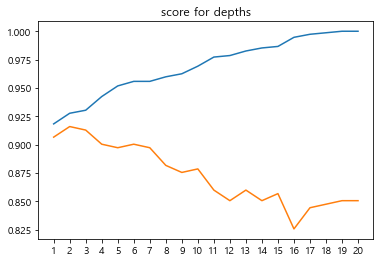

In [107]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [108]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
37,PI,0.106967
41,디스크단면적,0.099442
7,체중,0.095485
31,전방디스크높이(mm),0.081252
30,흡연여부,0.073694
35,MF + ES,0.069620
1,수술시간,0.065525
9,헤모글로빈수치,0.062416
5,연령,0.047743
38,PT,0.044472


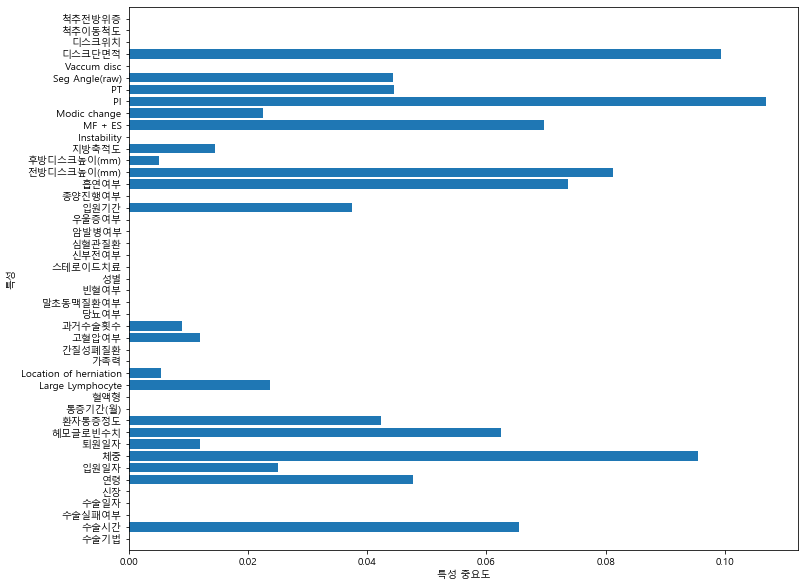

In [109]:
# 각 모델의 특성 중요도 시각화 (내림차순되어있지 않음)
plt.figure(figsize=(12, 10))
def plot_feature_importances_재발(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


plot_feature_importances_재발(model)

In [110]:
pred_dt = model.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_dt)
print(conf_matrix)

[[262  29]
 [ 19  11]]


In [112]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_dt)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       291
           1       0.28      0.37      0.31        30

    accuracy                           0.85       321
   macro avg       0.60      0.63      0.62       321
weighted avg       0.87      0.85      0.86       321



### Random Forest

In [113]:
# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(X_train)

x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth = 6, n_estimators= 200)

rf_clf.fit(x_train_std, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200)

In [115]:
rf_train_score = rf_clf.score(x_train_std, y_train)
rf_test_score = rf_clf.score(x_test_std, y_test)
print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,3)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,3)} 입니다.')

랜덤포레스트 훈련 정확도는 0.924 입니다.
랜덤포레스트 테스트 정확도는 0.907 입니다.


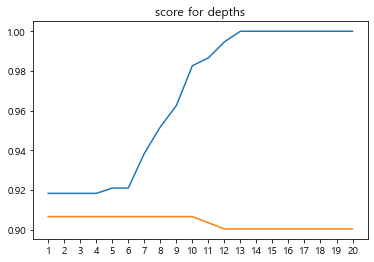

In [116]:
train_score=[]
test_score=[]
for i in range(1,21):
    rf_clf = RandomForestClassifier(max_depth = i, n_estimators=200)
    rf_clf.fit(x_train_std, y_train)
    train_score.append(rf_clf.score(x_train_std, y_train))
    test_score.append(rf_clf.score(x_test_std, y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [117]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          rf_clf.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
7,체중,0.077419
41,디스크단면적,0.068295
9,헤모글로빈수치,0.064729
5,연령,0.055467
35,MF + ES,0.054654
38,PT,0.053897
33,지방축적도,0.053590
37,PI,0.053272
31,전방디스크높이(mm),0.047680
39,Seg Angle(raw),0.044395


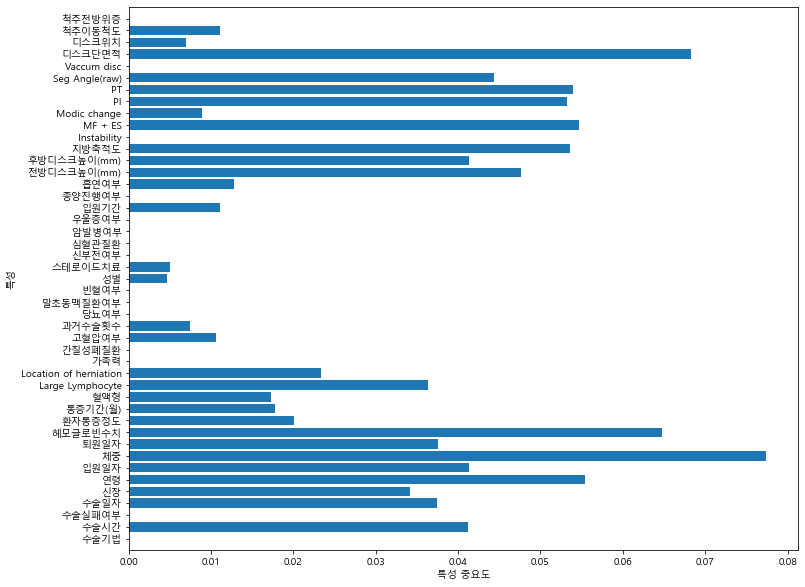

In [118]:
plt.figure(figsize=(12, 10))
def plot_feature_importances_재발(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), rf_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_재발(rf_clf)

In [119]:
pred_rf = rf_clf.predict(x_test_std)

In [120]:
conf_matrix = confusion_matrix(y_test, pred_rf)
print(conf_matrix)

[[289   2]
 [ 30   0]]


In [121]:
class_report = classification_report(y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       291
           1       0.00      0.00      0.00        30

    accuracy                           0.90       321
   macro avg       0.45      0.50      0.47       321
weighted avg       0.82      0.90      0.86       321



### Gradient Boosting

In [122]:
from sklearn.ensemble import GradientBoostingClassifier


gbrt = GradientBoostingClassifier(max_depth = 2, learning_rate = 0.03)
gbrt.fit(x_train_std, y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=2)

In [123]:
gbrt_train_score = gbrt.score(x_train_std, y_train)
gbrt_test_score = gbrt.score(x_test_std, y_test)
print(f'그레디언트부스팅 훈련 정확도는 {round(gbrt_train_score,3)} 입니다.')
print(f'그레디언트부스팅 테스트 정확도는 {round(gbrt_test_score,3)} 입니다.')

그레디언트부스팅 훈련 정확도는 0.926 입니다.
그레디언트부스팅 테스트 정확도는 0.907 입니다.


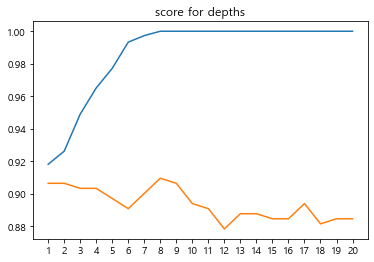

In [124]:
train_score=[]
test_score=[]
for i in range(1,21):
    gbrt = GradientBoostingClassifier(max_depth = i, learning_rate = 0.03)
    gbrt.fit(x_train_std, y_train)
    train_score.append(gbrt.score(x_train_std, y_train))
    test_score.append(gbrt.score(x_test_std, y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [125]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":gbrt.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
41,디스크단면적,0.122513
37,PI,0.106805
31,전방디스크높이(mm),0.085347
1,수술시간,0.081248
30,흡연여부,0.076926
35,MF + ES,0.075575
7,체중,0.074326
5,연령,0.055613
9,헤모글로빈수치,0.050946
10,환자통증정도,0.043893


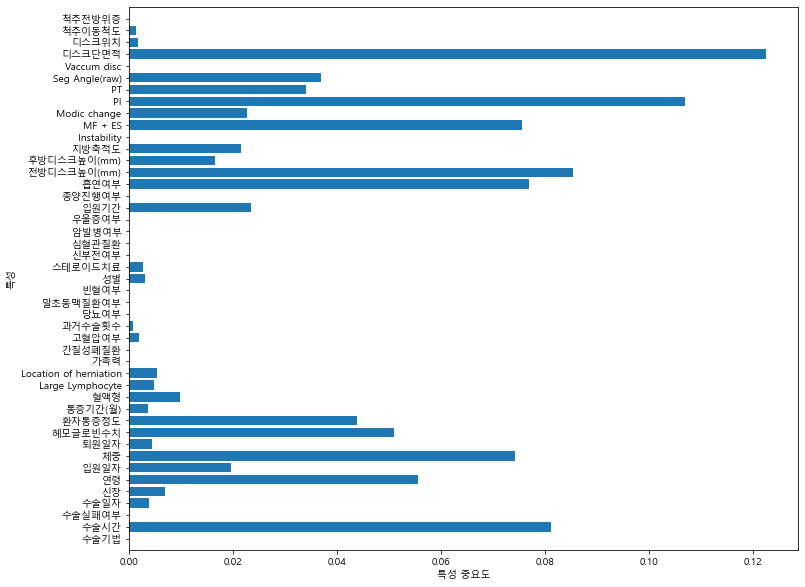

In [126]:
plt.figure(figsize=(12, 10))
def plot_feature_importances_재발(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), gbrt.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_재발(gbrt)

In [127]:
pred_gb = gbrt.predict(x_test_std)

In [128]:
conf_matrix = confusion_matrix(y_test, pred_gb)
print(conf_matrix)

[[273  18]
 [ 19  11]]


In [129]:
class_report = classification_report(y_test, pred_gb)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       291
           1       0.38      0.37      0.37        30

    accuracy                           0.88       321
   macro avg       0.66      0.65      0.65       321
weighted avg       0.88      0.88      0.88       321



### Decision Tree 특성 중요도

In [130]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
37,PI,0.106967
41,디스크단면적,0.099442
7,체중,0.095485
31,전방디스크높이(mm),0.081252
30,흡연여부,0.073694
35,MF + ES,0.069620
1,수술시간,0.065525
9,헤모글로빈수치,0.062416
5,연령,0.047743
38,PT,0.044472


### Random Forest 중요도

In [131]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          rf_clf.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
7,체중,0.077419
41,디스크단면적,0.068295
9,헤모글로빈수치,0.064729
5,연령,0.055467
35,MF + ES,0.054654
38,PT,0.053897
33,지방축적도,0.053590
37,PI,0.053272
31,전방디스크높이(mm),0.047680
39,Seg Angle(raw),0.044395


### Gradient Boosting 중요도

In [132]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":gbrt.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
41,디스크단면적,0.122513
37,PI,0.106805
31,전방디스크높이(mm),0.085347
1,수술시간,0.081248
30,흡연여부,0.076926
35,MF + ES,0.075575
7,체중,0.074326
5,연령,0.055613
9,헤모글로빈수치,0.050946
10,환자통증정도,0.043893


In [133]:
# 디시전 : 지방축적도 , 체중,  pt , 전방, 흡연, 환자통증정도 , 혈액형 , 후방 , 수술시간, 단면적

# 랜덤포 : 체중, 지방축적도, 헤모글로빈, mf+es, 연령, pt ,pi , seg, 전방, 후방

# 그레디 : 지방축적, 체중, pt ,흡연여부,전방, 환자통증, seg ,헤모글로빈, pi, 단면적

# 3개 중복 : 지방축적도, 체중, pt, 전방 

# 2개 중복 : 헤모글로빈, pi, 단면적, 후방, 흡연 , 환자통증정도, seg

### 재발여부 0 환자수, 재발여부1 환자수를 동일하게 맞춰서 머신러닝 test

In [134]:
df_m.shape

(1067, 46)

In [135]:
df_m['재발여부'].unique()

array([0, 1], dtype=int64)

In [136]:
df_m1 = df_m[df_m['재발여부']==1]

In [137]:
df_m1

,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증
28,0.0,35.0,0,20191218,179,64,20191215,1,77.8,20191218,...,1510.70,2,52.9,25.0,15.9,0,2035.90,4,0,0
58,0.0,79.0,0,20191204,175,39,20191203,1,74.6,20191204,...,2481.20,0,59.6,22.5,8.9,0,2170.20,4,2,0
65,0.0,37.0,0,20190216,159,34,20190215,1,59.0,20190217,...,1801.10,0,40.8,4.9,28.1,0,1869.40,4,0,0
132,0.0,39.0,0,20190529,164,39,20190526,1,60.7,20190529,...,2846.50,0,50.5,13.2,12.7,0,2109.50,4,2,0
165,0.0,92.0,0,20191106,161,30,20191105,1,59.7,20191107,...,2400.63,0,62.1,35.2,9.4,0,2052.07,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841,0.0,45.0,0,20150323,175,32,20150322,1,99.0,20150324,...,2057.00,0,39.2,14.3,9.1,0,2067.00,4,2,0
1842,0.0,60.0,0,20150403,175,55,20150402,1,75.0,20150403,...,2046.00,0,35.0,11.5,28.0,0,2745.00,4,2,0
1868,0.0,95.0,0,20170222,187,28,20170221,1,100.0,20170222,...,3422.30,0,44.4,20.4,19.4,0,2099.50,4,3,0
1881,0.0,35.0,0,20170327,173,21,20170327,1,62.0,20170401,...,2027.00,0,44.5,17.6,21.2,0,1749.00,4,2,0


In [138]:
df_m0 = df_m[df_m['재발여부']==0].sample(frac = 0.093)
df_m0

,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증
1083,0.0,50.000000,0,20090428,173,25,20090428,0,70.0,20090429,...,2203.10,0,69.2,35.7,15.3,0,1781.10,4,2,0
1775,0.0,35.000000,0,20130214,158,45,20130213,0,59.0,20130215,...,1788.75,0,38.0,6.1,20.4,0,1864.24,4,0,0
294,0.0,65.000000,0,20200730,177,34,20200729,0,76.1,20200730,...,2258.00,2,39.6,6.6,24.4,0,1479.00,4,2,0
1056,0.0,45.000000,0,20090408,177,33,20090407,0,78.0,20090409,...,3007.40,2,34.1,8.8,2.5,0,2579.20,4,0,0
930,0.0,30.000000,0,20190527,175,22,20190525,0,99.0,20190528,...,1919.50,0,31.7,14.9,9.6,0,1813.00,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,0.0,35.000000,0,20121121,152,60,20121120,0,56.0,20121121,...,2498.50,0,41.1,4.4,19.8,0,2307.20,4,2,0
1707,0.0,62.066304,0,20111222,164,20,20111221,0,55.0,20111223,...,1921.73,0,30.9,4.4,16.4,0,1554.57,5,2,0
1121,0.0,90.000000,0,20090528,157,19,20090527,0,61.0,20090528,...,1712.60,0,49.8,16.9,11.6,0,1602.00,5,0,0
1627,0.0,60.000000,0,20161109,171,46,20161108,0,70.0,20161112,...,2118.30,0,38.8,15.7,8.2,0,2104.20,4,3,0


In [139]:
df_re = pd.concat([df_m0 ,df_m1],ignore_index = True)
df_re

,수술기법,수술시간,수술실패여부,수술일자,신장,연령,입원일자,재발여부,체중,퇴원일자,...,MF + ES,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0.0,50.0,0,20090428,173,25,20090428,0,70.0,20090429,...,2203.10,0,69.2,35.7,15.3,0,1781.10,4,2,0
1,0.0,35.0,0,20130214,158,45,20130213,0,59.0,20130215,...,1788.75,0,38.0,6.1,20.4,0,1864.24,4,0,0
2,0.0,65.0,0,20200730,177,34,20200729,0,76.1,20200730,...,2258.00,2,39.6,6.6,24.4,0,1479.00,4,2,0
3,0.0,45.0,0,20090408,177,33,20090407,0,78.0,20090409,...,3007.40,2,34.1,8.8,2.5,0,2579.20,4,0,0
4,0.0,30.0,0,20190527,175,22,20190525,0,99.0,20190528,...,1919.50,0,31.7,14.9,9.6,0,1813.00,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.0,45.0,0,20150323,175,32,20150322,1,99.0,20150324,...,2057.00,0,39.2,14.3,9.1,0,2067.00,4,2,0
178,0.0,60.0,0,20150403,175,55,20150402,1,75.0,20150403,...,2046.00,0,35.0,11.5,28.0,0,2745.00,4,2,0
179,0.0,95.0,0,20170222,187,28,20170221,1,100.0,20170222,...,3422.30,0,44.4,20.4,19.4,0,2099.50,4,3,0
180,0.0,35.0,0,20170327,173,21,20170327,1,62.0,20170401,...,2027.00,0,44.5,17.6,21.2,0,1749.00,4,2,0


In [140]:
X = df_re.drop(['재발여부'], axis = 1) # input data
y = df_re['재발여부'].ravel() # target data


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [141]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f'훈련 정확도 : {train_accuracy}')
print(f'테스트 정확도 : {test_accuracy}')

훈련 정확도 : 0.7952755905511811
테스트 정확도 : 0.5272727272727272


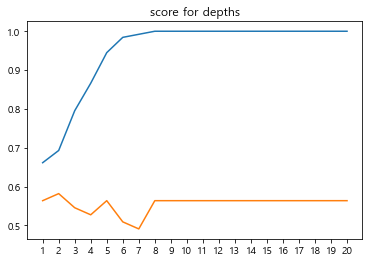

In [142]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [143]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          model.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
5,연령,0.155373
39,Seg Angle(raw),0.110098
9,헤모글로빈수치,0.094466
11,통증기간(월),0.086685
28,입원기간,0.077585
38,PT,0.070042
41,디스크단면적,0.064833
8,퇴원일자,0.061905
31,전방디스크높이(mm),0.059028
4,신장,0.054184


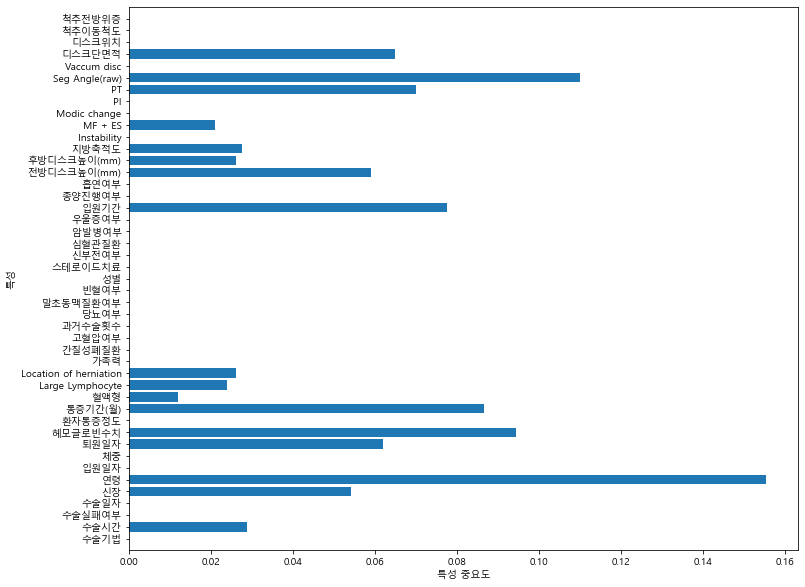

In [144]:
plt.figure(figsize=(12, 10))
def plot_feature_importances_재발(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


plot_feature_importances_재발(model)

In [145]:
pred_dt = model.predict(X_test)

In [146]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_dt)
print(conf_matrix)

[[15 13]
 [11 16]]


In [147]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_dt)
print(class_report)

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        28
           1       0.55      0.59      0.57        27

    accuracy                           0.56        55
   macro avg       0.56      0.56      0.56        55
weighted avg       0.56      0.56      0.56        55



In [148]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(X_train)

x_train_std = scaler.transform(X_train)
x_test_std = scaler.transform(X_test)

In [149]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth = 7, n_estimators= 200)

rf_clf.fit(x_train_std, y_train)

RandomForestClassifier(max_depth=7, n_estimators=200)

In [150]:
rf_train_score = rf_clf.score(x_train_std, y_train)
rf_test_score = rf_clf.score(x_test_std, y_test)
print(f'랜덤포레스트 훈련 정확도는 {round(rf_train_score,3)} 입니다.')
print(f'랜덤포레스트 테스트 정확도는 {round(rf_test_score,3)} 입니다.')

랜덤포레스트 훈련 정확도는 1.0 입니다.
랜덤포레스트 테스트 정확도는 0.691 입니다.


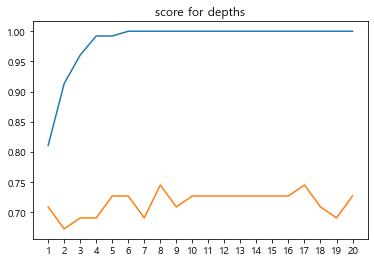

In [151]:
train_score=[]
test_score=[]
for i in range(1,21):
    rf_clf = RandomForestClassifier(max_depth = i, n_estimators=1000)
    rf_clf.fit(x_train_std, y_train)
    train_score.append(rf_clf.score(x_train_std, y_train))
    test_score.append(rf_clf.score(x_test_std, y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [152]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":
                          rf_clf.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
5,연령,0.094798
39,Seg Angle(raw),0.070810
33,지방축적도,0.054345
31,전방디스크높이(mm),0.053752
35,MF + ES,0.053446
7,체중,0.051786
13,Large Lymphocyte,0.051459
41,디스크단면적,0.049633
38,PT,0.048477
37,PI,0.045281


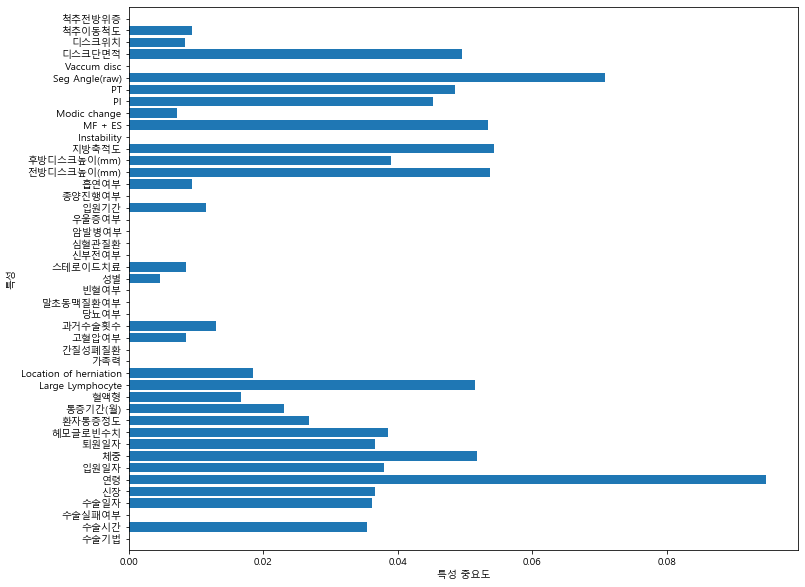

In [153]:
plt.figure(figsize=(12, 10))
def plot_feature_importances_재발(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), rf_clf.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_재발(rf_clf)

In [154]:
pred_rf = rf_clf.predict(x_test_std)

In [155]:
conf_matrix = confusion_matrix(y_test, pred_rf)
print(conf_matrix)

[[17 11]
 [ 4 23]]


In [156]:
class_report = classification_report(y_test, pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.68      0.85      0.75        27

    accuracy                           0.73        55
   macro avg       0.74      0.73      0.72        55
weighted avg       0.74      0.73      0.72        55



In [157]:
from sklearn.ensemble import GradientBoostingClassifier


gbrt = GradientBoostingClassifier(max_depth = 3, learning_rate = 0.03)
gbrt.fit(x_train_std, y_train)

GradientBoostingClassifier(learning_rate=0.03)

In [158]:
gbrt_train_score = gbrt.score(x_train_std, y_train)
gbrt_test_score = gbrt.score(x_test_std, y_test)
print(f'그레디언트부스팅 훈련 정확도는 {round(gbrt_train_score,3)} 입니다.')
print(f'그레디언트부스팅 테스트 정확도는 {round(gbrt_test_score,3)} 입니다.')

그레디언트부스팅 훈련 정확도는 1.0 입니다.
그레디언트부스팅 테스트 정확도는 0.582 입니다.


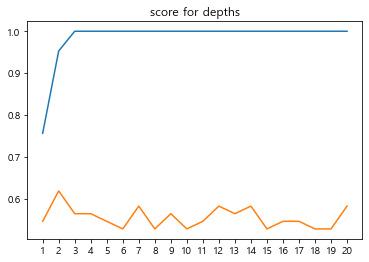

In [159]:
train_score=[]
test_score=[]
for i in range(1,21):
    gbrt = GradientBoostingClassifier(max_depth = i, learning_rate = 0.03)
    gbrt.fit(x_train_std, y_train)
    train_score.append(gbrt.score(x_train_std, y_train))
    test_score.append(gbrt.score(x_test_std, y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

In [160]:
importance = pd.DataFrame({'feature_names':X.columns, "특성 중요도":gbrt.feature_importances_})
importance.sort_values(by = "특성 중요도",ascending = False).head(12)

,feature_names,특성 중요도
5,연령,0.126735
39,Seg Angle(raw),0.107517
9,헤모글로빈수치,0.092794
11,통증기간(월),0.092409
28,입원기간,0.078592
31,전방디스크높이(mm),0.073561
4,신장,0.066049
38,PT,0.059899
1,수술시간,0.053342
32,후방디스크높이(mm),0.032530


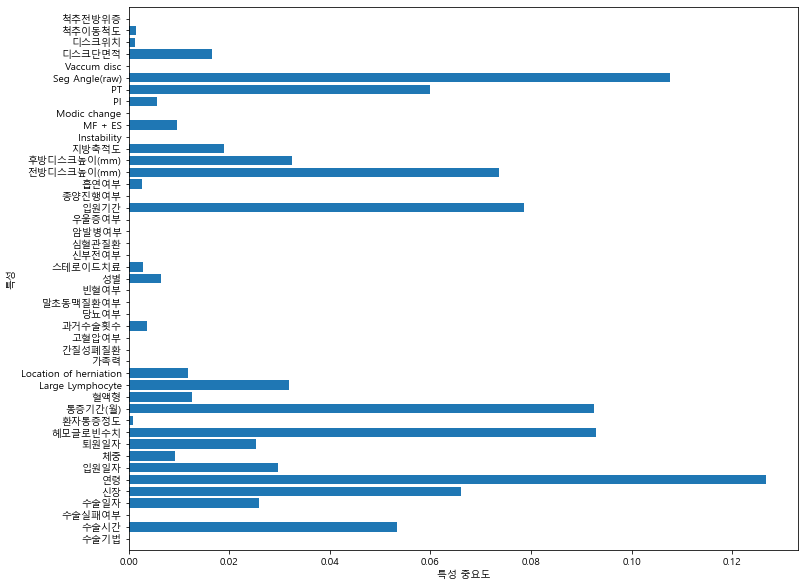

In [161]:
plt.figure(figsize=(12, 10))
def plot_feature_importances_재발(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), gbrt.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_재발(gbrt)

In [162]:
pred_gb = gbrt.predict(x_test_std)
conf_matrix = confusion_matrix(y_test, pred_gb)
print(conf_matrix)

[[16 12]
 [11 16]]


In [163]:
class_report = classification_report(y_test, pred_gb)
print(class_report)

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.57      0.59      0.58        27

    accuracy                           0.58        55
   macro avg       0.58      0.58      0.58        55
weighted avg       0.58      0.58      0.58        55



- PCA 주성분 분석 (princial component Analysis)  - 그냥 해본거

In [164]:
#서로 의존성이 높은 피쳐들을 함께 학습 시키면, 모델의 과적합이 발생하여 학습 성능이 저하될 수 있음.

#데이터의 피쳐를 압축하자, 데이터 테이블 매트릭스의 차원을 낮추자. 단순히 피쳐들을 빼는게 아니라, 
#여러개의 피쳐들이 갖는 정보를 하나로 압축 하는 것임 

In [165]:
from sklearn.decomposition import PCA

X = df_m.drop(['재발여부'], axis = 1) # input data
y = df_m['재발여부'].ravel() # target data

# 주성분 분석 ! 
pca = PCA(n_components=2) # n_components 몇개의 피쳐로 데이터 차원 줄일건지 

# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(df_m)
df_m_pca = pca.transform(df_m)
print("원본 데이터 형태 :", df_m.shape)
print('축소된 데이터 형태 :', df_m_pca.shape)

원본 데이터 형태 : (1067, 46)
축소된 데이터 형태 : (1067, 2)


In [166]:
pca.components_.shape

(2, 46)

In [167]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
DF_pca = pd.DataFrame(df_m_pca,columns=pca_columns)
DF_pca['target']= y
display(DF_pca.head(3))

# 주성분 분석 이후 평균/표준편차 확인 
display(DF_pca.describe())

,pca_component_1,pca_component_2,target
0,-53898.112658,-30.083313,0
1,-53963.734625,-82.796743,0
2,-54007.535110,-68.577267,0


,pca_component_1,pca_component_2,target
count,1.067000e+03,1.067000e+03,1067.000000
mean,-2.273481e-11,4.180502e-10,0.085286
std,6.367877e+04,2.260939e+03,0.279438
min,-7.137460e+04,-1.630798e+04,0.000000
25%,-5.373441e+04,-3.592758e+01,0.000000
50%,-1.958703e+04,-2.795193e+01,0.000000
75%,6.681622e+04,1.398902e+01,0.000000
max,1.200077e+05,4.159296e+04,1.000000


<AxesSubplot:xlabel='pca_component_1', ylabel='pca_component_2'>

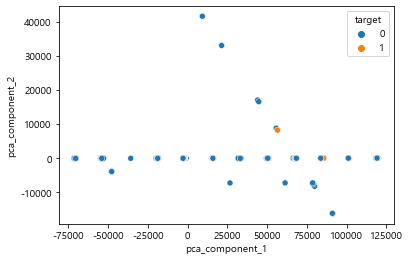

In [168]:
sns.scatterplot(data = DF_pca, x = 'pca_component_1', y = 'pca_component_2', hue = 'target')

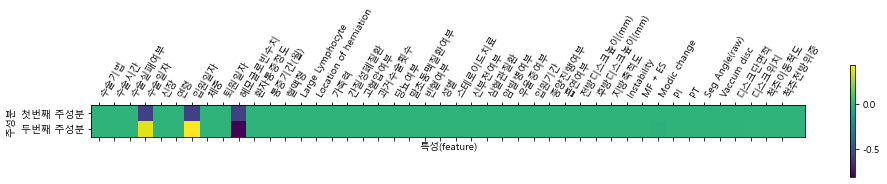

In [169]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['첫번째 주성분', '두번째 주성분'])
plt.colorbar()
plt.xticks(range(len(X.columns)),
          X.columns, rotation = 60, ha = 'left')
plt.xlabel('특성(feature)')
plt.ylabel('주성분')
plt.show()

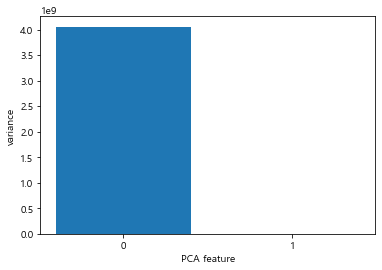

In [170]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()